In [126]:
import pandas as pd
import pandas_datareader.data as pdr
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

## Reading Data

In [7]:
def get_quandl_data(ticker, start, end, api_key):
    '''
    Function which retrieves stocks from Quandl,
    then inverts the index so most recent dates 
    are at the end of the dataframe
    
    :param ticker - Code of stock to be retrieved
    :param start - start date of stocks retrieval
    :param end - end date of stocks retrieval
    :param api_key - Quandl API key
    
    :return data - dataframe of chosen stock data
    '''
    data = pdr.DataReader(ticker, 'quandl', start, end, api_key=api_key)
    # reverse index of dataframe
    data = data.iloc[::-1]
    return data

In [50]:
# data import variables
start = '1995-1-1'
end = '2020-9-1'
key = 'mHcE9xa_-yTjCaVSoyGS'

In [123]:
df_FB = get_quandl_data('FB', start, end, api_key=key)
df_AAPL = get_quandl_data('AAPL', start, end, api_key=key)
df_MSFT = get_quandl_data('MSFT', start, end, api_key=key)
df_GOOGL = get_quandl_data('GOOGL', start, end, api_key=key)
df_C =  get_quandl_data('C', start, end, api_key=key)

## How Stocks have been affected by Economic Events

### Dot-com bubble

In [128]:
df_MSFT['Close'][(df_MSFT.index > '1998-12-31') & (df_MSFT.index < '2003-1-1')].plot()

### 2008 Recession

In [75]:
df_GOOGL['Close'][(df_GOOGL.index > '2006-12-31') & (df_GOOGL.index < '2010-1-1')].plot()

### 2014 - Stock Split Google

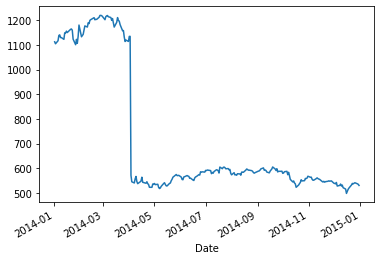

In [98]:
df_GOOGL['Close']['2014'].plot()

### 2018 Stock market crack + 2020 COVID
- Federal reserve increasing interest rates too quickly
- Global economy slowed
- Trump-China Trade war

Rise in 2019:
- Reduced US-China Tensions, terms agreed december 2018
- Federal reserve put on hold - stopped raising interest rates

2020:
Google saw 13% growth in revenues in Q1 of 2020, stock is currently up 5% since January.

In [84]:
# Google stocks
GOOGL = pdr.DataReader("GOOGL", 
                       data_source='yahoo')

GOOGL['Close'].plot()

In [79]:
# Facebook Stocks 
FB = pdr.DataReader("FB", 
                    data_source='yahoo')

FB['Close'].plot()

## Bollinger Bands


In [52]:
cols = ['30d mavg', 'Upper Band', 'Lower Band', 'Close']

In [151]:
# Microsoft
df_MSFT['30d mavg'] = df_MSFT['Close'].rolling(window=30).mean()
df_MSFT['30d std'] = df_MSFT['Close'].rolling(window=30).std()

df_MSFT['Upper Band'] = df_MSFT['30d mavg'] + (df_MSFT['30d std'] * 2)
df_MSFT['Lower Band'] = df_MSFT['30d mavg'] - (df_MSFT['30d std'] * 2)

# Bollinger band dataframe
df_boll_MSFT = pd.DataFrame(df_MSFT[cols]['2017'])
df_boll_MSFT.plot()

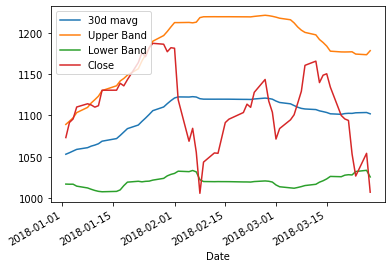

In [150]:
# Google - 2018
df_GOOGL['30d mavg'] = df_GOOGL['Close'].rolling(window=30).mean()
df_GOOGL['30d std'] = df_GOOGL['Close'].rolling(window=30).std()

df_GOOGL['Upper Band'] = df_GOOGL['30d mavg'] + (df_GOOGL['30d std'] * 2)
df_GOOGL['Lower Band'] = df_GOOGL['30d mavg'] - (df_GOOGL['30d std'] * 2)

# Bollinger band df
df_boll_GOOGL = pd.DataFrame(df_GOOGL[cols]['2018'])
df_boll_GOOGL.plot()

## Multiple Moving Averages - Moving Average Crossover trading

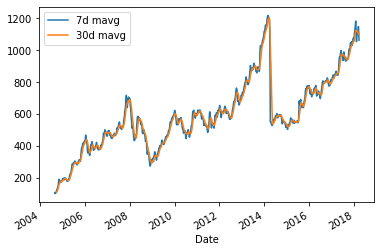

In [96]:
df_GOOGL['30d mavg'] = df_GOOGL['Close'].rolling(window=30).mean()
df_GOOGL['7d mavg'] = df_GOOGL['Close'].rolling(window=7).mean()

df_GOOGL[['7d mavg', '30d mavg']][df_GOOGL.index < '2010-1-1'].plot()

In [106]:
df_FB['30d mavg'] = df_FB['Close'].rolling(window=30).mean()
df_FB['7d mavg'] = df_FB['Close'].rolling(window=7).mean()

df_FB[['7d mavg', '30d mavg']]['2017'].plot()

In [142]:
# Initialize the short and long windows
short_window = 30
long_window = 100

# Initialize the `signals` DataFrame with the `signal` column
trade_signals = pd.DataFrame(index=df_FB.index)
trade_signals['signal'] = 0.0

# Create short simple moving average over the short window
trade_signals['short_mavg'] = df_FB['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
trade_signals['long_mavg'] = df_FB['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
trade_signals['signal'][short_window:] = np.where(trade_signals['short_mavg'][short_window:] 
                                            > trade_signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
trade_signals['positions'] = trade_signals['signal'].diff()

In [146]:
# Initialize the plot figure
fig = plt.figure(figsize=(24,12))

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
df_FB['Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
trade_signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(trade_signals.loc[trade_signals.positions == 1.0].index, 
         trade_signals.short_mavg[trade_signals.positions == 1.0],
         '^', markersize=10, color='g')
         
# Plot the sell signals
ax1.plot(trade_signals.loc[trade_signals.positions == -1.0].index, 
         trade_signals.short_mavg[trade_signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()

## Correlation

In [91]:
df_correlation = pd.DataFrame()

df_correlation['Google'] = df_GOOGL['Close']
df_correlation['Facebook'] = df_FB['Close']
df_correlation['Apple'] = df_AAPL['Close']
df_correlation['Microsoft'] = df_MSFT['Close']
df_correlation['Citi'] = df_C['Close']

sns.heatmap(df_correlation.corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000224C1E1FAC8>,
      dtype=object)

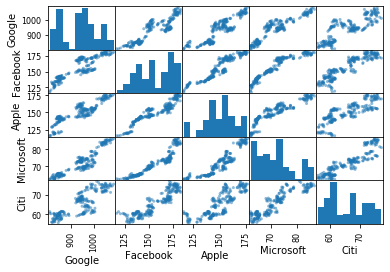

In [90]:
from pandas.plotting import scatter_matrix

scatter_matrix(df_correlation)